[View in Colaboratory](https://colab.research.google.com/github/ttppss/Deep_Learning_Practice/blob/master/Deep%20Learning%20With%20Python.ipynb)

In [0]:
!pip install -q keras

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 2s 1us/step


In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np

In [0]:
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
    return results

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.6932 - acc: 0.4982 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_ac

15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 10/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 11/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 12/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 13/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 14/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 15/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 16/20
15000/15000 [=====================

15000/15000 [==============================] - 1s 88us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 19/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 20/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947


In [26]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

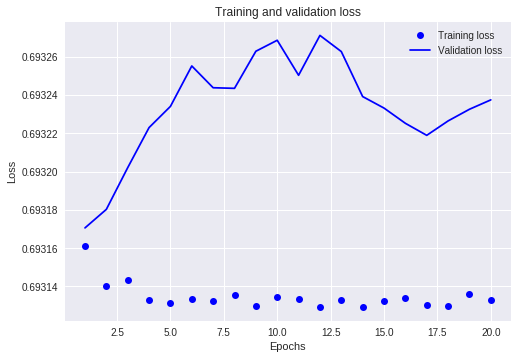

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

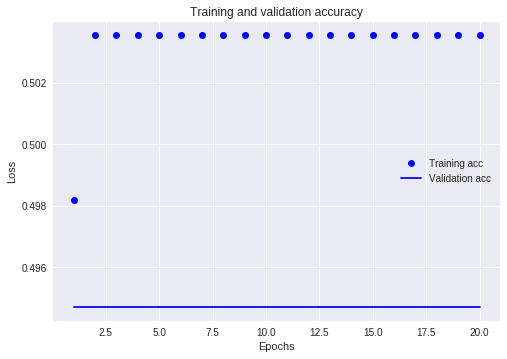

In [32]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.6932 - acc: 0.4991
Epoch 2/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.6932 - acc: 0.4961
Epoch 3/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.6932 - acc: 0.4999
Epoch 4/4
25000/25000 [==============================] - 3s 124us/step


# Deep Learning Natural Language Processing

In [1]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat', 'The dog ate my homework']
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [2]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [3]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

17465344/17464789 [==============================] - 3s 0us/step


In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 215us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 3s 168us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 3s 170us/step - los

In [5]:
!wget http://mng.bz/0tIo

--2018-08-27 00:33:54--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2018-08-27 00:33:54--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
ERROR: cannot verify mng.bz's certificate, issued by ‘CN=Go Daddy Secure Certificate Authority - G2,OU=http://certs.godaddy.com/repository/,O=GoDaddy.com\\, Inc.,L=Scottsdale,ST=Arizona,C=US’:
  Unable to locally verify the issuer's authority.
To connect to mng.bz insecurely, use `--no-check-certificate'.


In [6]:
!wget --no-check-certificate http://mng.bz/0tIo

--2018-08-27 00:33:56--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2018-08-27 00:33:56--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2018-08-27 00:33:56--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.132.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.132.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  14.7MB/s    in 3.9s    

2018-08-27 00:34:00 (14.7 MB/s) - ‘0tIo’ saved [60711700/6071170

In [16]:
!ls

0tIo  aclImdb  __MACOSX  sample_data


In [15]:
!unzip 0tIo

Archive:  0tIo
   creating: aclImdb/
  inflating: aclImdb/.DS_Store       
   creating: __MACOSX/
   creating: __MACOSX/aclImdb/
  inflating: __MACOSX/aclImdb/._.DS_Store  
   creating: aclImdb/test/
  inflating: aclImdb/test/.DS_Store  
   creating: __MACOSX/aclImdb/test/
  inflating: __MACOSX/aclImdb/test/._.DS_Store  
   creating: aclImdb/test/neg/
  inflating: aclImdb/test/neg/0_2.txt  
   creating: __MACOSX/aclImdb/test/neg/
  inflating: __MACOSX/aclImdb/test/neg/._0_2.txt  
  inflating: aclImdb/test/neg/10000_4.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10000_4.txt  
  inflating: aclImdb/test/neg/10001_1.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10001_1.txt  
  inflating: aclImdb/test/neg/10002_3.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10002_3.txt  
  inflating: aclImdb/test/neg/10003_3.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10003_3.txt  
  inflating: aclImdb/test/neg/10004_2.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10004_2.txt  
  inflating: aclImdb

In [0]:
import os

In [0]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [44]:
!ls

0tIo  aclImdb  glove.6B  glove.6B.zip  __MACOSX  sample_data


In [0]:
##!unzip 0tIo

In [0]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [22]:
labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
texts[:10]

["This is a bad movie. Not one of the funny bad ones either. This is a lousy bad one. It was actually painful to watch. The direction was awful,with lots of jumping around and the green and yellow hues used throughout the movie makes the characters look sickly. Keira Knightly was not convincing as a tough chick at all,and I cannot believe Lucy Liu and Mickey Rourke signed on for this criminal waste of celluloid. The script was terrible and the acting was like fingernails across a chalkboard. If you haven't seen it,don't. You are not missing anything and will only waste two hours of your life watching this drivel .I have seen bad movies before and even enjoyed them due to their faults. This one is just a waste of time.",
 "I saw this movie last month at a free sneak preview and I walked out. It was pretty horrible. In the process of trying too hard, they over acted and made a horrible movie. I was disappointed since I felt all the actors had made respectable choices in the past so this 

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [25]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2018-08-27 00:50:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-08-27 00:50:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  8.88MB/s    in 64s     

2018-08-27 00:51:10 (12.9 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [0]:
!mkdir glove.6B

In [27]:
!unzip glove.6B.zip -d glove.6B

Archive:  glove.6B.zip
  inflating: glove.6B/glove.6B.50d.txt  
  inflating: glove.6B/glove.6B.100d.txt  
  inflating: glove.6B/glove.6B.200d.txt  
  inflating: glove.6B/glove.6B.300d.txt  


In [28]:
!ls glove.6B

glove.6B.100d.txt  glove.6B.200d.txt  glove.6B.300d.txt  glove.6B.50d.txt


In [29]:
glove_dir = '/content/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [30]:
line = open('/content/glove.6B/glove.6B.100d.txt').readline()
print(line[:100])

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 


In [0]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [33]:
#check what's in word_index
# for word, i in word_index.items():
#   print(word, i)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10
this 11
that 12
was 13
as 14
for 15
with 16
movie 17
but 18
film 19
on 20
not 21
you 22
are 23
his 24
have 25
he 26
be 27
one 28
all 29
at 30
by 31
an 32
they 33
who 34
so 35
from 36
like 37
her 38
or 39
just 40
about 41
it's 42
out 43
if 44
has 45
some 46
there 47
what 48
good 49
more 50
when 51
very 52
up 53
no 54
time 55
she 56
even 57
my 58
would 59
which 60
only 61
story 62
really 63
see 64
their 65
had 66
can 67
were 68
me 69
well 70
than 71
we 72
much 73
been 74
bad 75
get 76
will 77
do 78
also 79
into 80
people 81
other 82
first 83
great 84
because 85
how 86
him 87
most 88
don't 89
made 90
its 91
then 92
way 93
make 94
them 95
too 96
could 97
any 98
movies 99
after 100
think 101
characters 102
watch 103
two 104
films 105
character 106
seen 107
many 108
being 109
life 110
plot 111
never 112
acting 113
little 114
best 115
love 116
over 117
where 118
did 119
show 120
know 121
off 122
ever 123
does 124
better 125
your 126
end 127
s

KeyboardInterrupt: ignored

In [0]:
#check what embeddings_index looks like and what's in the dictionary

from itertools import islice

def take(n, iterable):
    #"Return first n items of the iterable as a list"
    return list(islice(iterable, n))
  
n_items = take(10, embeddings_index.items())

print(n_items)

[('the', array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0

In [46]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [48]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 1.7404 - acc: 0.4900 - val_loss: 0.7376 - val_acc: 0.5146
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5822 - acc: 0.6950 - val_loss: 0.7133 - val_acc: 0.5359
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.7228 - acc: 0.7000 - val_loss: 0.7718 - val_acc: 0.5148
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2943 - acc: 0.9100 - val_loss: 0.9604 - val_acc: 0.4957
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2145 - acc: 0.9500 - val_loss: 0.7790 - val_acc: 0.5352
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1143 - acc: 0.9950 - val_loss: 0.8746 - val_acc: 0.5490
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4161 - acc: 0.8400 - val_loss: 0.6934 - val_acc: 0.5791
Epoch 8/10
200/200 [========

## Climate Prediction Example

In [0]:
!mkdir jena_climate

In [0]:
!cd jena_climate

In [5]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2018-08-29 00:53:47--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.99.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.99.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  4.39MB/s    in 3.0s    

2018-08-29 00:53:50 (4.39 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [6]:
!ls

jena_climate  jena_climate_2009_2016.csv.zip  sample_data


In [7]:
!unzip jena_climate_2009_2016.csv.zip -d jena_climate

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate/jena_climate_2009_2016.csv  


In [8]:
!ls jena_climate/

jena_climate_2009_2016.csv


In [9]:
import os

data_dir = '/content/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551
